In [3]:
jnk = ni.load('/Users/jakevogel/Science/tau/other_clustering_attempts/byhand/brain_rois.nii.gz').get_data()
len(np.unique(jnk))

731

In [1]:
import pandas
import itertools
import nibabel as ni
import numpy as np
import scipy.stats as st
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
atlas_paths = {'vcons':'/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz',
              'vcore':'/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz',
              'scholl':'/Users/jakevogel/Science/tau/tau_masks/shipping/tau_masks/berkeley/dkt_Braak_new_atlas.nii',
              'cho':'/Users/jakevogel/Science/tau/tau_masks/shipping/tau_masks/cho/dkt_Cho_new_atlas.nii',
              'swartz':'/Users/jakevogel/Science/tau/tau_masks/shipping/schwarz_1mm/schwartz_atlas.nii.gz'
               }

In [7]:
maskr = ni.load(atlas_paths['vcons']).get_data().astype(int)

In [10]:
data_dict = {}
for nm,path in atlas_paths.items():
    print('working on',nm)
    dat = ni.load(path).get_data().astype(int)
    dat = dat[maskr>0]
    unis = np.unique(dat)
    for uni in unis:
        if uni == 0 or uni > 9:
            continue
        else:
            print('working on',uni)
            jnk = deepcopy(dat)
            jnk[jnk!=uni] = 0
            data_dict.update({'%s_%s'%(nm,uni): jnk.flatten()})
    print('working on stages')
    if 'vco' not in nm:
        for uni in unis:
            if uni < 2 or uni > 9:
                continue
            else:
                print('working on',uni)
                jnk = deepcopy(dat)
                jnk[jnk>uni] = 0
                data_dict.update({'%s_stage%s'%(nm,uni):jnk.flatten()})

working on vcons
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on cho
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on 2
working on 3
working on 4
working on 5
working on vcore
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on swartz
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6
working on scholl
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6


In [13]:
data_dict = pandas.DataFrame(index=range(len(y)))
for nm,path in atlas_paths.items():
    print('working on',nm)
    dat = ni.load(path).get_data().astype(int)
    dat=dat[maskr>0]
    unis = np.unique(dat)
    for uni in unis:
        if uni == 0 or uni > 9:
            continue
        else:
            print('working on',uni)
            jnk = deepcopy(dat)
            jnk[jnk!=uni] = 0
            data_dict.ix[:,'%s_%s'%(nm,uni)] = jnk.flatten()
    if 'vco' not in nm:
        print('working on stages')
        for uni in unis:
            if uni < 2 or uni > 9:
                continue
            else:
                print('working on',uni)
                jnk = deepcopy(dat)
                jnk[jnk>uni] = 0
                data_dict.ix[:,'%s_stage%s'%(nm,uni)] = jnk.flatten()

working on vcons
working on 1
working on 2
working on 3
working on 4
working on 5
working on cho
working on 1
working on 2
working on 3
working on 4
working on 5
working on stages
working on 2
working on 3
working on 4
working on 5
working on vcore
working on 1
working on 2
working on 3
working on 4
working on 5
working on swartz
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6
working on scholl
working on 1
working on 2
working on 3
working on 4
working on 5
working on 6
working on stages
working on 2
working on 3
working on 4
working on 5
working on 6


In [14]:
data_dict.shape

(642104, 41)

In [12]:
x = data_dict['vcore_4']
y = data_dict['cho_stage4']

In [15]:
x2 = data_dict['vcore_5']
y2 = data_dict['cho_stage5']

In [16]:
y.shape

(642104,)

In [17]:
normalized_mutual_info_score(x,y)

0.042252284690796824

In [33]:
import scipy.spatial.distance as dist

In [53]:
dist.cosine(x,y)

0.52818489487988829

In [34]:
ham_scores = [dist.hamming(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        no_swartz,2)]

In [18]:
vcols = [x for x in data_dict.columns if 'vco' in x]
no_vcols = [x for x in data_dict.columns if 'vco' not in x]


In [19]:
no_swartz = [x for x in data_dict.columns if 'swartz' not in x]
swartz = [x for x in data_dict.columns if 'swartz' in x]

In [20]:
nmi_scores = np.full((len(no_swartz),len(no_swartz)),np.nan)
nmi_scores.shape

(30, 30)

In [21]:
len(no_swartz)

30

In [32]:
(.5 * len(list(itertools.combinations(no_swartz,2)))) / 60

3.625

In [31]:
%%timeit
scores = [normalized_mutual_info_score(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        data_dict.columns[:3],2)]

1 loop, best of 3: 581 ms per loop


In [35]:
%%timeit
jnk = []
for x,y in itertools.combinations(data_dict.columns[:3],2):
    print('working on',x,y)
    jnk.append(normalized_mutual_info_score(data_dict[x].values,data_dict[y].values))

working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
working on vcons_1 vcons_2
working on vcons_1 vcons_3
working on vcons_2 vcons_3
1 loop, best of 3: 585 ms per loop


In [22]:
scores = [normalized_mutual_info_score(data_dict[x].values,data_dict[y].values) for x,
        y in itertools.combinations(
        no_swartz,2)]

In [77]:
list(itertools.combinations(no_swartz,2))

[('vcons_1', 'vcons_2'),
 ('vcons_1', 'vcons_3'),
 ('vcons_1', 'vcons_4'),
 ('vcons_1', 'vcons_5'),
 ('vcons_1', 'vcore_1'),
 ('vcons_1', 'vcore_2'),
 ('vcons_1', 'vcore_3'),
 ('vcons_1', 'vcore_4'),
 ('vcons_1', 'vcore_5'),
 ('vcons_1', 'cho_1'),
 ('vcons_1', 'cho_2'),
 ('vcons_1', 'cho_3'),
 ('vcons_1', 'cho_4'),
 ('vcons_1', 'cho_5'),
 ('vcons_1', 'cho_stage2'),
 ('vcons_1', 'cho_stage3'),
 ('vcons_1', 'cho_stage4'),
 ('vcons_1', 'cho_stage5'),
 ('vcons_1', 'scholl_1'),
 ('vcons_1', 'scholl_2'),
 ('vcons_1', 'scholl_3'),
 ('vcons_1', 'scholl_4'),
 ('vcons_1', 'scholl_5'),
 ('vcons_1', 'scholl_6'),
 ('vcons_1', 'scholl_stage2'),
 ('vcons_1', 'scholl_stage3'),
 ('vcons_1', 'scholl_stage4'),
 ('vcons_1', 'scholl_stage5'),
 ('vcons_1', 'scholl_stage6'),
 ('vcons_2', 'vcons_3'),
 ('vcons_2', 'vcons_4'),
 ('vcons_2', 'vcons_5'),
 ('vcons_2', 'vcore_1'),
 ('vcons_2', 'vcore_2'),
 ('vcons_2', 'vcore_3'),
 ('vcons_2', 'vcore_4'),
 ('vcons_2', 'vcore_5'),
 ('vcons_2', 'cho_1'),
 ('vcons_2', '

In [23]:
scr_mtx = np.full((30,30),np.nan)

In [24]:
utri_ind = list(itertools.combinations(range(30),2))

In [116]:
xs =

In [25]:
uxs = np.array([x[0] for x in utri_ind])
uys = np.array([x[1] for x in utri_ind])

In [26]:
len(scr_mtx[(xs,ys)]) == len(scores)

NameError: name 'xs' is not defined

In [27]:
xs = np.array([x[0] for x in utri_ind])
ys = np.array([x[1] for x in utri_ind])

In [72]:
#scr_mtx[(xs,ys)] = ham_scores
scr_mtx[(xs,ys)] = scores

In [73]:
scr_mtx

array([[             nan,   2.99406413e-02,   2.79183951e-02,
          5.47982536e-02,   2.25625093e-02,   2.91999242e-03,
          6.44615417e-03,   1.64196269e-02,   9.56819986e-02,
          1.64358841e-02,   7.13322171e-03,   1.79820105e-02,
          1.15111339e-01,   1.48010102e-01,   4.27963156e-01,
          1.75169930e-02,   1.84059021e-02,   2.76418682e-02,
          1.32960141e-02,   2.91999242e-03,   1.92692665e-01,
          1.00806870e-02,   1.26350756e-02,   7.51014375e-03,
          1.64358841e-02,   1.53655235e-01,   9.23440389e-02,
          7.73130429e-02,   6.53424336e-02,   6.40789161e-02],
       [  2.49894098e-01,              nan,   1.08201140e-01,
          2.17319789e-01,   8.71077405e-02,   1.19699757e-02,
          3.45937239e-02,   6.31402018e-02,   1.08585435e-01,
          6.02528481e-02,   3.65894433e-02,   7.55151782e-02,
          1.00060816e-01,   1.05063824e-01,   1.54508590e-02,
          4.61122447e-01,   7.08651005e-02,   1.07107332e-01,
       

In [112]:
print(np.tril_indices(4))
print(np.triu_indices(4))
print(list(itertools.combinations_with_replacement([3,2,1,0],2)))

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]))
(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))
[(3, 3), (3, 2), (3, 1), (3, 0), (2, 2), (2, 1), (2, 0), (1, 1), (1, 0), (0, 0)]


In [74]:
ltri_ind = list(itertools.combinations(range(29,-1,-1),2))
lxs = np.array([x[0] for x in ltri_ind])
lys = np.array([x[1] for x in ltri_ind])
scr_mtx[(lxs,lys)] = scr_mtx.transpose()[(lxs,lys)]

In [75]:
ltri_ind = list(itertools.combinations(range(29,-1,-1),2))
lxs = np.array([x[0] for x in ltri_ind])
lys = np.array([x[1] for x in ltri_ind])
scr_mtx[(lxs,lys)] = scr_mtx.transpose()[(lxs,lys)]
scrdf = pandas.DataFrame(scr_mtx,index=no_swartz,columns=no_swartz)
scrdf.columns = no_swartz
scrdf.labels = no_swartz
scrdf

,vcons_1,vcons_2,vcons_3,vcons_4,vcons_5,cho_1,cho_2,cho_3,cho_4,cho_5,...,scholl_2,scholl_3,scholl_4,scholl_5,scholl_6,scholl_stage2,scholl_stage3,scholl_stage4,scholl_stage5,scholl_stage6
vcons_1,NaN,0.029941,0.027918,0.054798,0.022563,0.002920,0.006446,0.016420,0.095682,0.016436,...,0.192693,0.010081,0.012635,7.510144e-03,0.016436,0.153655,0.092344,0.077313,0.065342,0.064079
vcons_2,0.029941,NaN,0.108201,0.217320,0.087108,0.011970,0.034594,0.063140,0.108585,0.060253,...,0.017308,0.048560,0.012940,7.221987e-02,0.060253,0.021137,0.053202,0.049858,0.065938,0.080197
vcons_3,0.027918,0.108201,NaN,0.201826,0.081149,0.080901,0.082998,0.173341,0.092791,0.058793,...,0.007900,0.025814,0.113836,6.062543e-02,0.058793,0.056305,0.055328,0.150548,0.123495,0.128706
vcons_4,0.054798,0.217320,0.201826,NaN,0.161485,0.021858,0.002369,0.005530,0.031291,0.009907,...,0.031622,0.005330,0.014453,3.193401e-02,0.009907,0.038644,0.026771,0.032239,0.033361,0.034978
vcons_5,0.022563,0.087108,0.081149,0.161485,NaN,0.009026,0.021214,0.047499,0.030769,0.274855,...,0.013048,0.016053,0.033313,7.618406e-02,0.274855,0.015933,0.021579,0.037669,0.140440,0.171008
cho_1,0.002920,0.011970,0.080901,0.021858,0.009026,NaN,0.003635,0.006571,0.038320,0.006578,...,0.001813,0.005082,0.010328,3.200547e-02,0.006578,0.613232,0.344334,0.229990,0.186518,0.176968
cho_2,0.006446,0.034594,0.082998,0.002369,0.021214,0.003635,NaN,0.019062,0.112305,0.019081,...,0.005253,0.606803,0.029987,9.358447e-02,0.019081,0.006413,0.503643,0.336397,0.272813,0.258844
cho_3,0.016420,0.063140,0.173341,0.005530,0.047499,0.006571,0.019062,NaN,0.207500,0.034557,...,0.009499,0.026675,0.511556,1.721139e-01,0.034557,0.011598,0.029174,0.388647,0.315187,0.299049
cho_4,0.095682,0.108585,0.092791,0.031291,0.030769,0.038320,0.112305,0.207500,NaN,0.207717,...,0.055494,0.013353,0.041614,4.693531e-01,0.207717,0.067898,0.050791,0.075282,0.424218,0.402498
cho_5,0.016436,0.060253,0.058793,0.009907,0.274855,0.006578,0.019081,0.034557,0.207717,NaN,...,0.009509,0.026701,0.054461,1.722916e-01,1.000000,0.011609,0.029203,0.065818,0.294521,0.485124


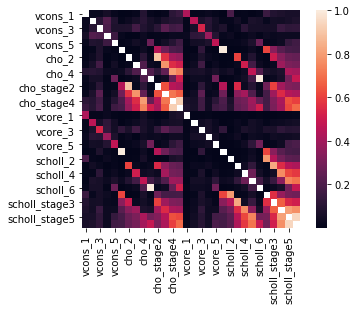

In [76]:
plt.close()
sns.heatmap(scrdf,square=True)
plt.show()

In [77]:
nocore = [x for x in scrdf.columns if 'core' not in x]
nocore

['vcons_1',
 'vcons_2',
 'vcons_3',
 'vcons_4',
 'vcons_5',
 'cho_1',
 'cho_2',
 'cho_3',
 'cho_4',
 'cho_5',
 'cho_stage2',
 'cho_stage3',
 'cho_stage4',
 'cho_stage5',
 'scholl_1',
 'scholl_2',
 'scholl_3',
 'scholl_4',
 'scholl_5',
 'scholl_6',
 'scholl_stage2',
 'scholl_stage3',
 'scholl_stage4',
 'scholl_stage5',
 'scholl_stage6']

In [78]:
vog_cons_snap = scrdf.loc[scrdf.index[:5]][nocore[5:]]
vog_cons_snap.index = ['Subcortex/Hipp','Frontal','Medial/Anterior Temporal',
                      'Temporo-parietal','Sensorimotor/Visual']

In [79]:
jnk = vog_cons_snap.columns.tolist()
for i,col in enumerate(jnk):
    if 'cho_' in col:
        num = int(col[-1])
        if num>1:
            jnk[i] = col[:-1]+str(num+1)
vog_cons_snap.columns = jnk
            

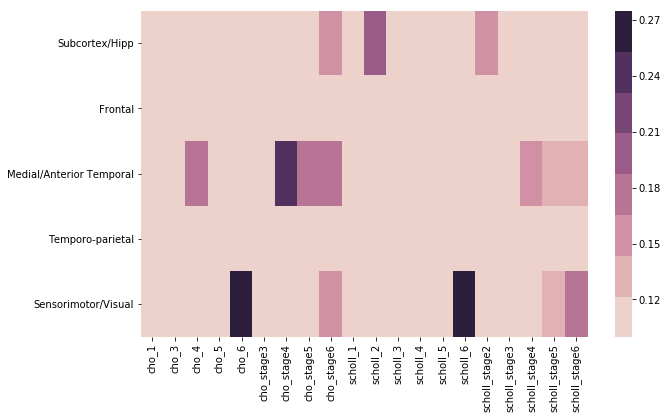

In [87]:
plt.close()
fig,ax = plt.subplots(figsize=(10,6))
#sns.heatmap(vog_cons_snap,cmap='RdBu_r',vmin=0.1)
sns.heatmap(vog_cons_snap,cmap=sns.cubehelix_palette(8), vmin=0.1)
plt.show()

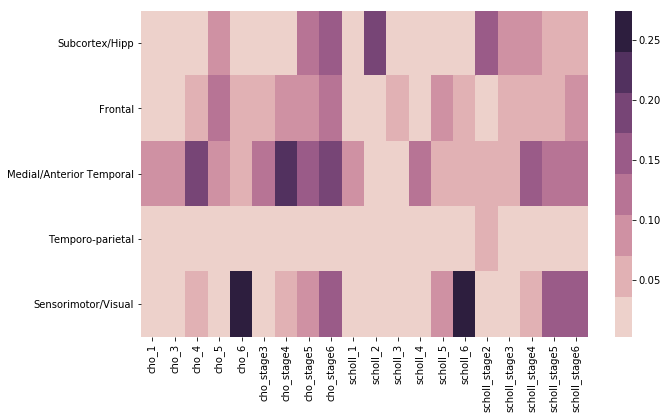

In [86]:

plt.close()
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(vog_cons_snap, cmap=sns.cubehelix_palette(8))
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/nmi.pdf',
#            bbox_inches='tight')
plt.show()


In [54]:
def overlap(lab1,lab2,data):
    x = data[lab1]
    y = data[lab2]
    newx = deepcopy(x)
    newy = deepcopy(y)
    newx[newx<1] = 0
    newy[newy<1] = 0
    xtot = len(newx[newx>0])
    ytot = len(newy[newy>0])
    
    overlap = len(newx[newy>0][newx[newy>0]>0])
    overlap_xy = overlap / xtot
    overlap_yx = overlap / ytot
    
    del(newx,newy)
    return overlap_xy,overlap_yx

In [55]:
x = 'vcons_4'
y = 'swartz_5'
overlap(x,y,data_dict)

(0.0032352294500109934, 0.41365461847389556)

In [56]:
sw_olap = pandas.DataFrame(index=vcols,columns=swartz)
for x in vcols:
    print('working on',x)
    for y in swartz:
        ox,oy = overlap(x,y,data_dict)
        sw_olap.ix[x,y] = oy

working on vcons_1
working on vcons_2
working on vcons_3
working on vcons_4
working on vcons_5
working on vcore_1
working on vcore_2
working on vcore_3
working on vcore_4
working on vcore_5


In [57]:
snapshot2 = sw_olap.loc[sw_olap.index[:5]]
snapshot2.index = ['Subcortex/Hipp','Frontal','Medial/Anterior Temporal',
                    'Temporo-parietal','Sensorimotor/Visual']

In [58]:
jnk = ['schwarz_%s'%(x[7:]) for x in snapshot2.columns]
snapshot2.columns = jnk

In [59]:
snapshot2 = snapshot2.astype(float)

In [67]:
sns.heatmap?

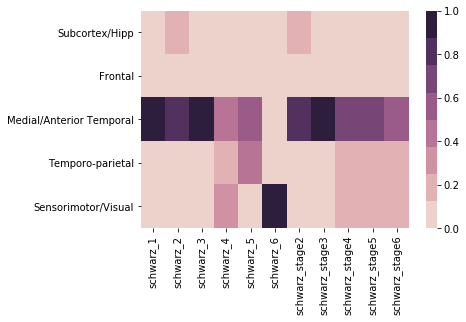

In [68]:
plt.close()
#fig = sns.heatmap(snapshot2.dropna(),cmap='RdBu_r')
fig = sns.heatmap(snapshot2.dropna(),cmap=sns.cubehelix_palette(8))
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/olap.pdf',
 #           bbox_inches='tight')
plt.show()

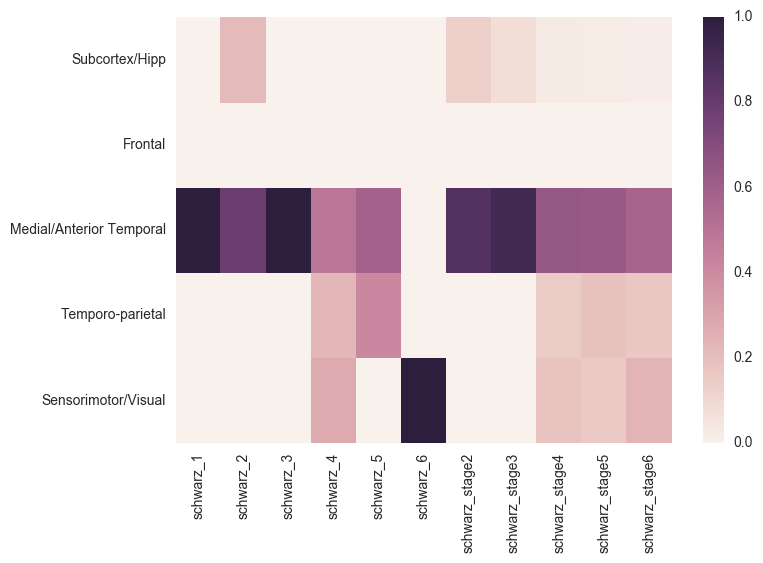

In [189]:
plt.close()
fig = sns.heatmap(snapshot2.dropna())
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/olap.pdf',
            bbox_inches='tight')
plt.show()

In [179]:
data_dict.columns[10:21]

Index(['swartz_1', 'swartz_2', 'swartz_3', 'swartz_4', 'swartz_5', 'swartz_6',
       'swartz_stage2', 'swartz_stage3', 'swartz_stage4', 'swartz_stage5',
       'swartz_stage6'],
      dtype='object')

In [121]:
dkt = ni.load('/Users/jakevogel/Science/tmp/tau/dkt_atlas_1mm.nii.gz').get_data().astype(int)
vcore_img = ni.load(atlas_paths['vcons']).get_data().astype(int)

In [14]:
dkt[maskr<1] = 0

In [15]:
labels = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv',
                        header=None)
labels.index = labels[:][labels.columns[0]]
labels.drop(labels.columns[0],axis=1,inplace=True)
labels.columns = ['roi']
labels.head()

,roi
0,
1,Caudal anterior cingulate
2,Caudal middle frontal
3,Cuneus
4,entorinal
5,fusiform


In [16]:
nlcols = []
for i,row in labels.iterrows():
    if i < 40:
        nlcols.append('l_%s'%(row['roi']))
    else:
        nlcols.append('r_%s'%(row['roi']))
labels.ix[:,'roi'] = nlcols
labels.head()

,roi
0,
1,l_ Caudal anterior cingulate
2,l_ Caudal middle frontal
3,l_ Cuneus
4,l_ entorinal
5,l_ fusiform


In [17]:
len(roi[roi>0])

NameError: name 'roi' is not defined

In [34]:
roi = vcore_img[dkt==i]
counts = np.bincount(roi)
print(counts)
unique = list(np.unique(roi))
print(unique)
size = len(roi[roi>0])
print(size)
while 0 in unique:
    unique.remove(0)
for x,u in enumerate(unique):
    if u != 0:
        percs.ix[labels.ix[i,'roi'],percs.columns[u-1]] = (counts[x]/size)

[814   0   0  14   3]
[0, 3, 4]
17


NameError: name 'percs' is not defined

In [94]:
labels.loc[36]

roi    l_ Hippocampus
Name: 36, dtype: object

In [111]:
labels.loc[75]

roi    r_ Hippocampus
Name: 75, dtype: object

In [115]:
jnk = deepcopy(vcore_img)
jnk[dkt==75] = 1000
#jnk[jnk<1000] = 0
#jnk[jnk>0] = 1
print(np.unique(jnk))
#nimg = ni.Nifti1Image(jnk,ni.load(atlas_paths['vcore']).affine)
#nimg.to_filename('/Users/jakevogel/Science/tmp/tau/tmp_fl')

[0 1]


In [122]:
i = 75
row = labels.loc[i]
print('working on',row['roi'])
roi = vcore_img[dkt==i]
counts = list(np.bincount(roi))
unique = np.unique(roi)
size = len(roi[roi>0])
print(counts,unique,size)
print(len(roi[roi==1]))

working on r_ Hippocampus
[3135, 3003, 0, 1296] [0 1 3] 4299
3003


In [123]:
percs = pandas.DataFrame(index = labels['roi'], columns = snapshot2.index)
for i,row in labels.iterrows():
    if i > 0:
        print('working on',row['roi'])
        roi = vcore_img[dkt==i]
        counts = list(np.bincount(roi))
        unique = np.unique(roi)
        size = len(roi[roi>0])
        while 0 in counts:
            counts.remove(0)
        for x,u in enumerate(unique):
            if u != 0:
                percs.ix[labels.ix[i,'roi'],percs.columns[u-1]] = (counts[x]/size)
                

working on l_ Caudal anterior cingulate
working on l_ Caudal middle frontal
working on l_ Cuneus
working on l_ entorinal
working on l_ fusiform
working on l_ Inferior parietal
working on l_ Inferior temporal
working on l_ Isthmus cingulate
working on l_ Lateral Occipital
working on l_ Lateral orbitofronal
working on l_ Lingual gyrus
working on l_ Medial orbitofrontal
working on l_ Middle temporal
working on l_ Parahippocampal
working on l_ Paracentral 
working on l_ Pars opercularis
working on l_ Pars orbitalis
working on l_ Pars triangularis
working on l_ Pericalcarine
working on l_ Postcentral
working on l_ Posterior cingulate
working on l_ Precentral
working on l_ Precuneus
working on l_ Rostral anterior cingulate
working on l_ Rostral middle frontal
working on l_ Superior frontal
working on l_ Superior parietal
working on l_ Superior Temporal
working on l_ Supramarginal
working on l_ Transverse temporal
working on l_ Insula
working on l_ Basal forebrain
working on l_ Amygdala
worki

In [124]:
for x in percs.index:
    for y in percs.columns:
        if not pandas.notnull(percs.ix[x,y]):
            percs.ix[x,y] = 0

In [125]:
percs.index = [x for x[:-3] in percs.index if '?' in x else x]

SyntaxError: invalid syntax (<ipython-input-125-0df5b7806d26>, line 1)

In [126]:
percs

,Subcortex/Hipp,Frontal,Medial/Anterior Temporal,Temporo-parietal,Sensorimotor/Visual
roi,,,,,
l_ Caudal anterior cingulate,0,0.691631,0,0,0.308369
l_ Caudal middle frontal,0,0.0167104,0,0.98329,0
l_ Cuneus,0,0,0,0.0360513,0.963949
l_ entorinal,0,0,1,0,0
l_ fusiform,0,0,0.81923,0.166132,0.0146381
l_ Inferior parietal,0,0,0,1,0
l_ Inferior temporal,0,0,0.982719,0.0172809,0
l_ Isthmus cingulate,0.00562852,0,0.00375235,0.987617,0.00300188
l_ Lateral Occipital,0,0,0.00145445,0.627661,0.370885


In [128]:
spercs = percs.sort_values(percs.columns.tolist(),0,False)

In [137]:
spercs.drop('r_ L Cerebellum',axis=0,inplace=True)
spercs.drop('r_ R Cerebellum',axis=0,inplace=True)
#spercs.index

In [61]:
sns.heatmap?

In [147]:
spercs.loc[[x for x in spercs.index if 'nsula' in x]]

,Subcortex/Hipp,Frontal,Medial/Anterior Temporal,Temporo-parietal,Sensorimotor/Visual
roi,,,,,
r_ Insula,0,0.148706,0.606706,0.244588,0
l_ Insula,0,0.139899,0.703123,0.156977,0


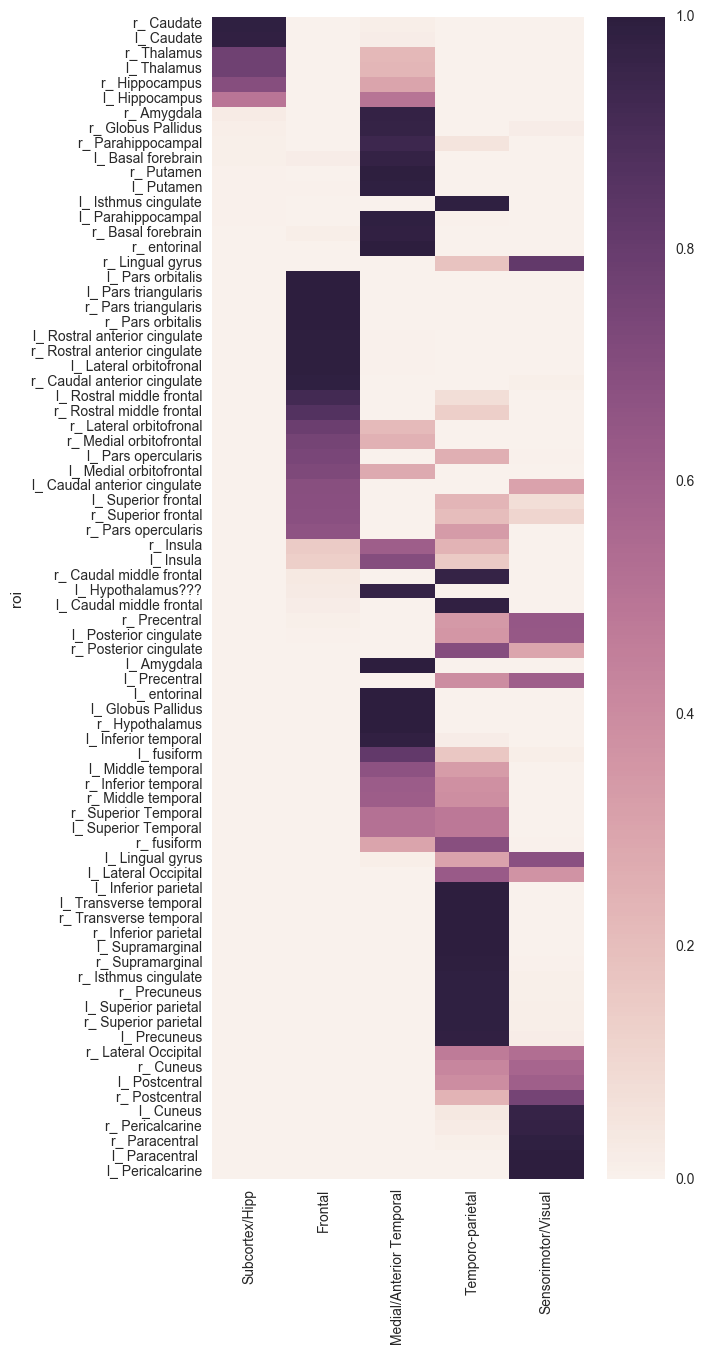

In [143]:
plt.close()
fig, ax = plt.subplots(figsize=(6,15))
sns.heatmap(spercs.astype(np.float64))
#fig.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/desikan_rois0.pdf',
#            bbox_inches='tight')
plt.show()

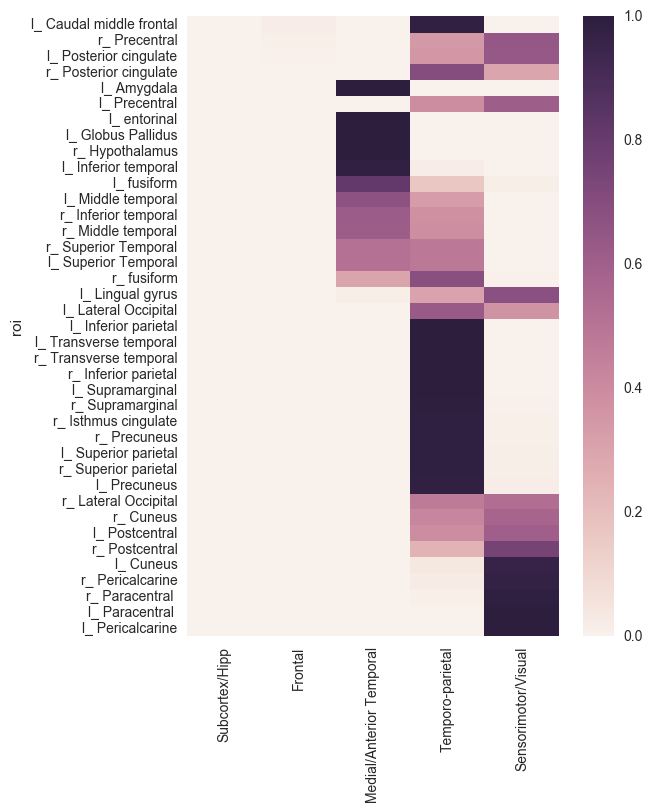

In [141]:
plt.close()
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(spercs.astype(np.float64)[39:])
fig.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/desikan_rois1.pdf',
            bbox_inches='tight')
plt.show()

In [87]:
i = 2
print(np.bincount(vcore_img[dkt==i]))
print(np.unique(vcore_img[dkt==i]))
print(len(vcore_img[dkt==i]))

[11303     0     0     0  3341]
[0 4]
14644


In [76]:
vcore_img.dtype

dtype('<f8')

In [81]:
dkt.dtype

dtype('int64')